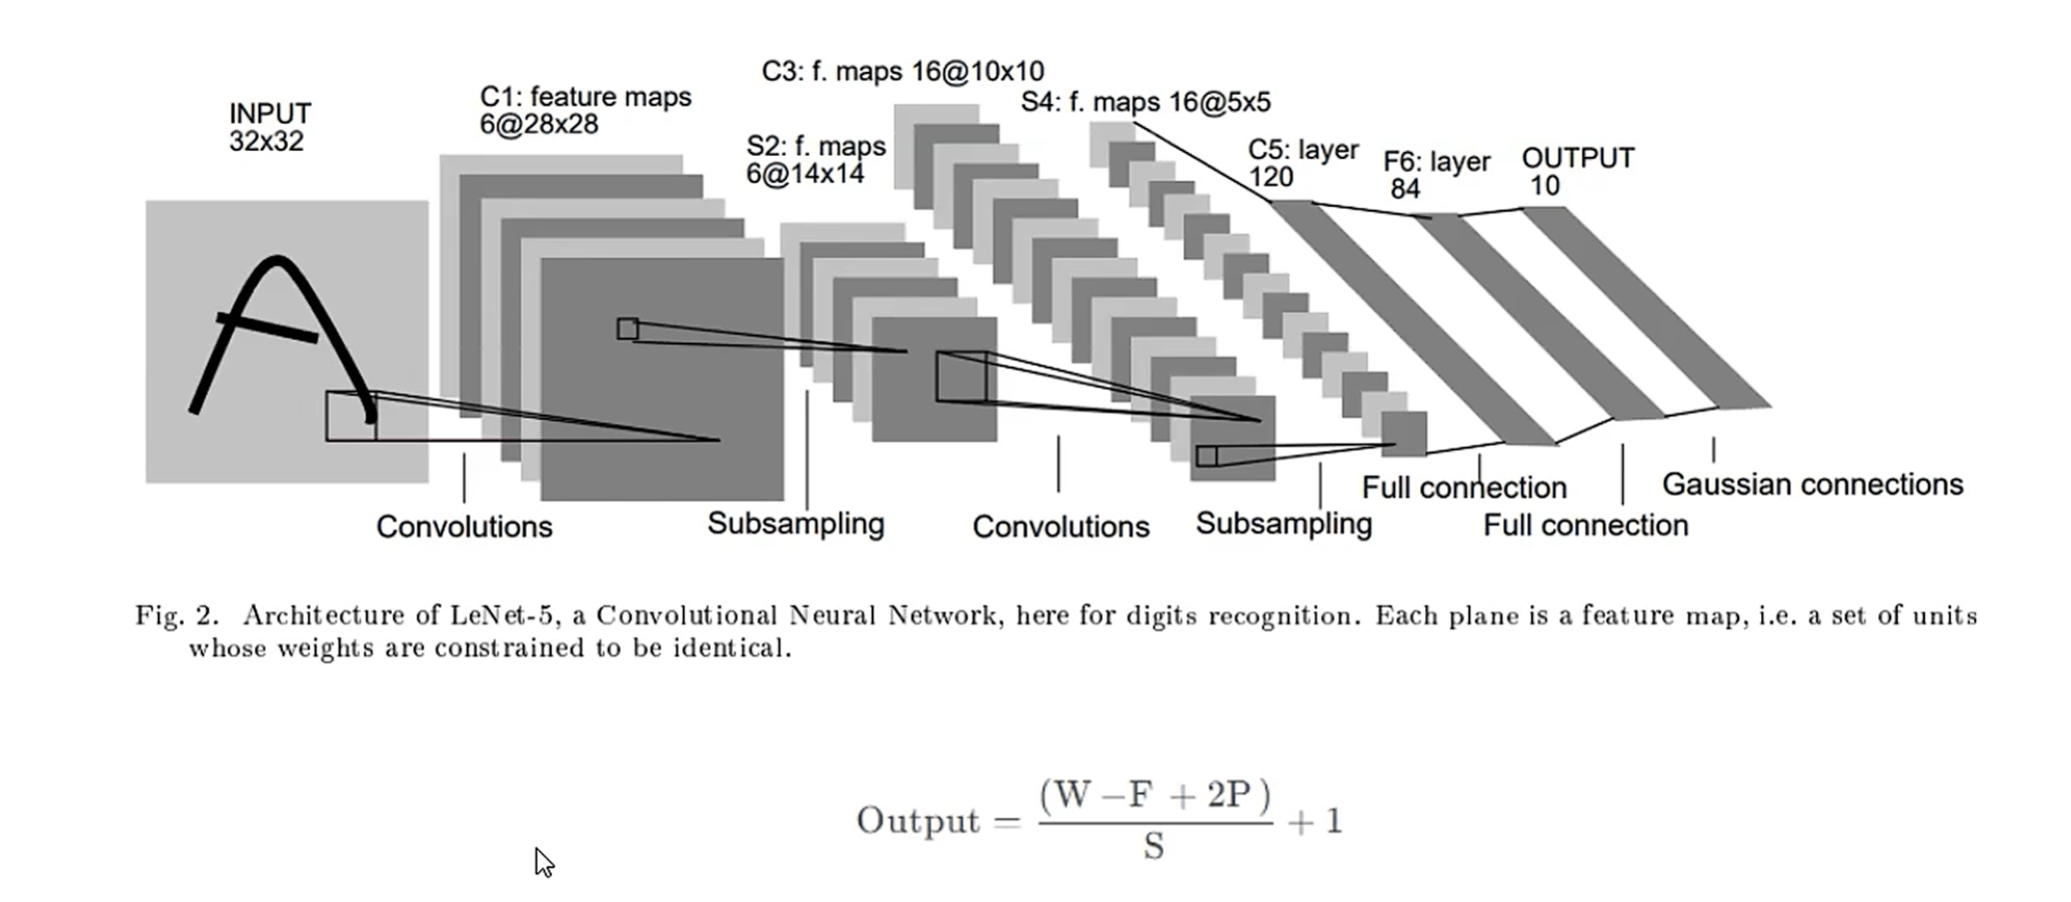

https://www.bilibili.com/video/BV1AP4y167bX?spm_id_from=333.788.videopod.episodes&vd_source=d8d1cb7c2fbd392ee1bd6c2f57af5b4e&p=2

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [35]:
# 搭建神经网络
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        # kernel size计算：假设s = 1, p = 0, conv1->f = 5
        self.conv1 = nn.Conv2d(3, 6, 5)    # nn.Conv2d(input nc, output nc, kernel size)  
        self.conv2 = nn.Conv2d(6,16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)
    def forward(self,x):
        #tensor[batch, channel, H, W]
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x,2)    # max_pool2d(x,max pooling kernel size)
        # x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)  # 明确指定 kernel_size

        # 进入全连接层之前先展平
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # 输出就不激活了
        return x

In [4]:
net = Net
print(net)

<class '__main__.Net'>


In [13]:
# CIFAR-10
# 使用torch的torchvision加载初始化数据集
# 定义卷积神经网络
# 定义损失函数
# 根据训练数据训练网络
# 测试数据上测试网络

import torch
import torchvision
import torchvision.transforms as transforms  # 这个可以用来加载数据集
import matplotlib.pyplot as plt
import numpy as np

### Dataset
定义好数据格式和数据变换格式
### DataLoader
用迭代（iterative）的方式不断读入批次数据

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))   # 归一化
])

# 下载数据集
trainset = torchvision.datasets.CIFAR10(root = './data',train=True,
                                        download=True,transform=transform)
testset = torchvision.datasets.CIFAR10(root = './data',train=False,
                                        download=True,transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4,
                                          shuffle = True, num_workers = 0)  #(shuffle是打乱与否,训练集打乱，测试集不打乱，num_workers是几个线程)
testloader = torch.utils.data.DataLoader(testset, batch_size = 4,
                                          shuffle = False, num_workers = 0)  #(shuffle是打乱与否，num_workers是几个线程)


Files already downloaded and verified
Files already downloaded and verified


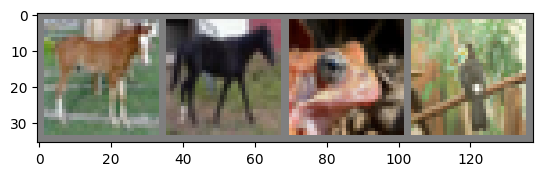

tensor([7, 7, 6, 2])


In [ ]:
# tensor[batch, channel, H, W]
# H, W, CHANNEL
def imshow(img):  # 恢复为正常图片然后通道转换再显示
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 迭代读取
dataiter = iter(trainloader)    # 训练数据包含图片信息和标签信息的
images, label = next(dataiter)
# batch_size = 4, 一次读四张
imshow(torchvision.utils.make_grid(images))
print(label)

In [27]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [20]:
# 定义损失函数---交叉熵损失函数
criterion = nn.CrossEntropyLoss()

In [21]:
# 定义优化器
import torch.optim as optim
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum = 0.9)

In [ ]:
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader,0):    # 0表示我们的i从0开始，记录批次信息

        inputs,label = data     # trainloader里面会包含图片和标签信息，我们将图片命名为inputs，标签命名为label
        
        optimizer.zero_grad()           # 每迭代完成一次，都要将梯度清零，进行一次梯度更新
        
        # 清零后才开始学习
        # forward+loss+backward+optimize
        outputs=net(inputs)                    # 预测值
        loss = criterion(outputs,label)
        loss.backward()                         # 后向传播获取梯度信息
        optimizer.step()

        running_loss +=loss.item()

        if i%2000 == 1999:
            print('[%d,%5d] loss:%.3f' % (epoch+1,i+1,running_loss/2000))
            running_loss=0.0

print("Finish")

In [37]:
# 保存权重
PATH='./cifar_net.pth'
torch.save(net.state_dict(),PATH)

In [39]:
# 测试数据上测试网络

dataiter = iter(testloader) #迭代器读数据
images,labels = next(dataiter)

In [40]:
net = Net()
PATH='./cifar_net.pth'
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [41]:
outputs=net(images)

In [42]:
print(outputs)

tensor([[-0.1370,  0.0650,  0.0169,  0.1098,  0.0304, -0.0543, -0.0700, -0.0226,
         -0.0422, -0.0980],
        [-0.1422,  0.0684,  0.0176,  0.1010,  0.0187, -0.0599, -0.0612, -0.0353,
         -0.0389, -0.1011],
        [-0.1362,  0.0628,  0.0241,  0.0947,  0.0121, -0.0602, -0.0680, -0.0341,
         -0.0420, -0.0915],
        [-0.1401,  0.0661,  0.0167,  0.1035,  0.0121, -0.0576, -0.0659, -0.0339,
         -0.0375, -0.1022]], grad_fn=<AddmmBackward0>)


In [44]:
_,predicted = torch.max(outputs, 1)   # 打印tensor的最大值，也就是我们预测的类别

In [45]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images,label = data

        outputs = net(images)
        _,predicted = torch.max(outputs,1)
        total +=label.size(0)
        correct = (predicted == labels).sum().item()

In [48]:
correctGailv = 100 * (correct / total)
print(correctGailv)

0.01
